In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import datetime as dt


In [7]:
df = pd.read_csv('dailyActivity_merged.csv')

In [9]:
df.shape

(457, 15)

In [11]:
df.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

In [13]:
df.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

In [15]:
df['Id'] =  df['Id'].astype(str)

In [17]:
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'])

In [19]:
df.dtypes

Id                                  object
ActivityDate                datetime64[ns]
TotalSteps                           int64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                    int64
FairlyActiveMinutes                  int64
LightlyActiveMinutes                 int64
SedentaryMinutes                     int64
Calories                             int64
dtype: object

In [21]:
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-03-25,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,2016-03-26,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,2016-03-27,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,2016-03-28,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,2016-03-29,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886


In [23]:
df['distance_diff'] = df['TotalDistance']- df['TrackerDistance']

In [25]:
df['distance_diff'].value_counts()

distance_diff
 0.00    441
 0.92      1
 1.20      1
 1.15      1
 1.18      1
 1.06      1
 1.19      1
 1.25      1
 1.36      1
 3.22      1
 0.78      1
 0.61      1
 6.73      1
 2.03      1
-0.57      1
 1.61      1
 0.81      1
Name: count, dtype: int64

In [27]:
df.query('LoggedActivitiesDistance > 0')

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,distance_diff
138,2891001357,2016-04-01,0,0.00,0.00,4.828032,0.00,0.00,0.00,0.00,0,660,0,780,4562,0.00
139,2891001357,2016-04-02,4126,3.22,0.00,3.218688,0.00,0.00,3.22,0.00,0,0,720,720,2881,3.22
142,2891001357,2016-04-05,2063,1.61,0.00,1.609344,0.00,0.00,1.61,0.00,0,0,630,99,1144,1.61
215,4057192912,2016-03-30,5419,4.00,4.57,0.055843,0.00,0.00,3.91,0.06,0,0,145,1295,2259,-0.57
335,6391747486,2016-04-02,2101,2.03,0.00,2.027773,2.03,0.00,0.00,0.00,46,0,0,1394,2224,2.03
338,6391747486,2016-04-05,9766,7.51,0.78,6.727057,0.00,0.05,7.46,0.00,0,6,301,1133,2442,6.73
359,6962181067,2016-04-06,12480,8.86,8.25,3.972795,4.18,0.69,4.00,0.00,55,14,276,593,2170,0.61
360,6962181067,2016-04-07,13417,9.65,8.87,1.926302,3.39,1.25,4.91,0.10,45,16,284,665,2244,0.78
361,6962181067,2016-04-08,14400,10.88,9.52,5.456864,2.47,2.88,5.53,0.00,27,37,276,697,2188,1.36
364,6962181067,2016-04-11,12362,9.09,8.17,2.696455,1.09,2.73,5.27,0.00,21,38,297,678,2188,0.92


In [29]:
df.columns = df.columns.str.lower()

In [31]:
df.columns

Index(['id', 'activitydate', 'totalsteps', 'totaldistance', 'trackerdistance',
       'loggedactivitiesdistance', 'veryactivedistance',
       'moderatelyactivedistance', 'lightactivedistance',
       'sedentaryactivedistance', 'veryactiveminutes', 'fairlyactiveminutes',
       'lightlyactiveminutes', 'sedentaryminutes', 'calories',
       'distance_diff'],
      dtype='object')

In [33]:
df.rename(columns = {'activitydate' : 'activity_date' , 'totalsteps' : 'total_steps', 'totaldistance' : 'total_distance', 'trackerdistance' : 'tracker_distance',
       'loggedactivitiesdistance' : 'logged_activities_distance', 'veryactivedistance' : 'very_active_distance',
       'moderatelyactivedistance' : 'moderately_active_distance', 'lightactivedistance' : 'light_active_distance',
       'sedentaryactivedistance' : 'sedentary_active_distance', 'veryactiveminutes' : 'very_active_minutes', 'fairlyactiveminutes' : 'fairly_active_minutes',
       'lightlyactiveminutes' : 'lightly_active_minutes', 'sedentaryminutes' : 'sedentary_minutes'}, inplace = True )

In [35]:
df.head()

,id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,distance_diff
0,1503960366,2016-03-25,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819,0.0
1,1503960366,2016-03-26,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154,0.0
2,1503960366,2016-03-27,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944,0.0
3,1503960366,2016-03-28,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932,0.0
4,1503960366,2016-03-29,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886,0.0


In [37]:
day_of_week = df['activity_date'].dt.day_name()
df['day_of_week'] = day_of_week

In [39]:
df['n_day_of_week'] = df['activity_date'].dt.weekday

In [41]:
df.head(5)

,id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,distance_diff,day_of_week,n_day_of_week
0,1503960366,2016-03-25,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819,0.0,Friday,4
1,1503960366,2016-03-26,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154,0.0,Saturday,5
2,1503960366,2016-03-27,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944,0.0,Sunday,6
3,1503960366,2016-03-28,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932,0.0,Monday,0
4,1503960366,2016-03-29,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886,0.0,Tuesday,1


In [43]:
df.isnull().sum()

id                            0
activity_date                 0
total_steps                   0
total_distance                0
tracker_distance              0
logged_activities_distance    0
very_active_distance          0
moderately_active_distance    0
light_active_distance         0
sedentary_active_distance     0
very_active_minutes           0
fairly_active_minutes         0
lightly_active_minutes        0
sedentary_minutes             0
calories                      0
distance_diff                 0
day_of_week                   0
n_day_of_week                 0
dtype: int64

In [51]:
df.duplicated().sum()

0

In [53]:
#Analysis

df['id'].unique()
id_group = df.groupby(['id'])
id_avg_step = id_group['total_steps'].mean().sort_values(ascending = False)
id_avg_step = id_avg_step.to_frame()

conditions = [

    (id_avg_step <= 6000),
    (id_avg_step > 6000) & (id_avg_step < 12000),
    (id_avg_step >= 12000)
]

values = ['sedenary', 'active', 'very_active']
id_avg_step['activity_level'] = np.select(conditions, values)
id_activity_level = id_avg_step['activity_level']
id_avg_step

,total_steps,activity_level
id,,
8877689391,17417.083333,very_active
8053475328,14844.363636,very_active
6962181067,12639.714286,very_active
7007744171,12260.333333,very_active
2022484408,12174.916667,very_active
1503960366,11640.526316,active
2347167796,9800.066667,active
1644430081,9274.800000,active
3977333714,8663.916667,active


In [55]:
df['activity_level'] = [id_activity_level[i] for i in df['id']]
df.head(5)

,id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,distance_diff,day_of_week,n_day_of_week,activity_level
0,1503960366,2016-03-25,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819,0.0,Friday,4,active
1,1503960366,2016-03-26,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154,0.0,Saturday,5,active
2,1503960366,2016-03-27,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944,0.0,Sunday,6,active
3,1503960366,2016-03-28,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932,0.0,Monday,0,active
4,1503960366,2016-03-29,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886,0.0,Tuesday,1,active


In [59]:
df['id'].value_counts()

id
4057192912    32
4020332650    32
1503960366    19
1624580081    19
2347167796    15
4702921684    15
4445114986    15
6962181067    14
2320127002    12
4558609924    12
8792009665    12
8378563200    12
8253242879    12
7086361926    12
7007744171    12
2026352035    12
5553957443    12
8877689391    12
1844505072    12
2022484408    12
2873212765    12
3977333714    12
1927972279    12
4319703577    12
8053475328    11
5577150313    11
6290855005    10
1644430081    10
6117666160    10
3372868164    10
6391747486     9
6775888955     9
2891001357     8
8583815059     8
4388161847     8
Name: count, dtype: int64

In [63]:
df.describe()

,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,distance_diff,n_day_of_week
count,457,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000
mean,2016-04-04 04:40:26.258205696,6546.562363,4.663523,4.609847,0.179427,1.180897,0.478643,2.890197,0.001904,16.623632,13.070022,170.070022,995.282276,2189.452954,0.053676,3.089716
min,2016-03-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,0.000000,-0.570000,0.000000
25%,2016-04-02 00:00:00,1988.000000,1.410000,1.280000,0.000000,0.000000,0.000000,0.870000,0.000000,0.000000,0.000000,64.000000,728.000000,1776.000000,0.000000,1.000000
50%,2016-04-05 00:00:00,5986.000000,4.090000,4.090000,0.000000,0.000000,0.020000,2.930000,0.000000,0.000000,1.000000,181.000000,1057.000000,2062.000000,0.000000,3.000000
75%,2016-04-08 00:00:00,10198.000000,7.160000,7.110000,0.000000,1.310000,0.670000,4.460000,0.000000,25.000000,16.000000,257.000000,1285.000000,2667.000000,0.000000,5.000000
max,2016-04-12 00:00:00,28497.000000,27.530001,27.530001,6.727057,21.920000,6.400000,12.510000,0.100000,202.000000,660.000000,720.000000,1440.000000,4562.000000,6.730000,6.000000
std,NaN,5398.493064,4.082072,4.068540,0.849232,2.487159,0.830995,2.237523,0.008487,28.919704,36.208635,122.205372,337.021404,815.484523,0.402765,2.078145


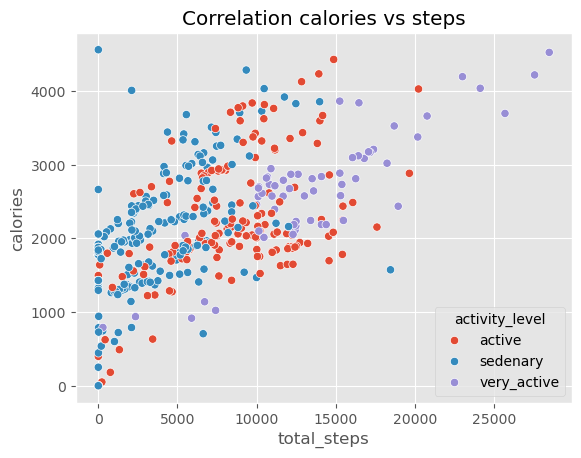

In [79]:
ax = sns.scatterplot(x = 'total_steps', y = 'calories', data = df , hue = df['activity_level'])
plt.title('Correlation calories vs steps')
plt.show()

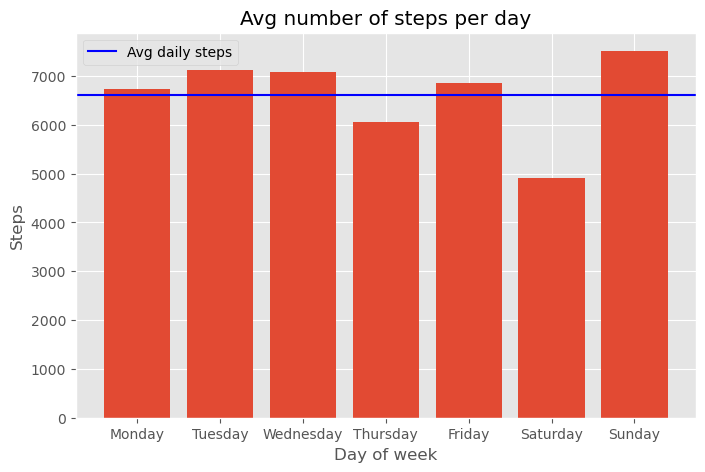

In [97]:
day_of_week = ['Monday', 'Tuesday', 'Wednesday' , 'Thursday' , 'Friday' , 'Saturday' , 'Sunday']
fig, ax = plt.subplots(1,1,figsize = (8,5))
day_group = df.groupby(['day_of_week'])
avg_daily_steps = day_group['total_steps'].mean()
avg_steps = df['total_steps'].mean()
plt.bar(avg_daily_steps.index, avg_daily_steps)
ax.set_xticks(range(len(day_of_week)))
ax.set_xticklabels(day_of_week)

ax.axhline(y=avg_daily_steps.mean(), color = 'blue', label = 'Avg daily steps')
ax.set_ylabel('Steps')
ax.set_xlabel('Day of week')
ax.set_title('Avg number of steps per day')
plt.legend()
plt.show()

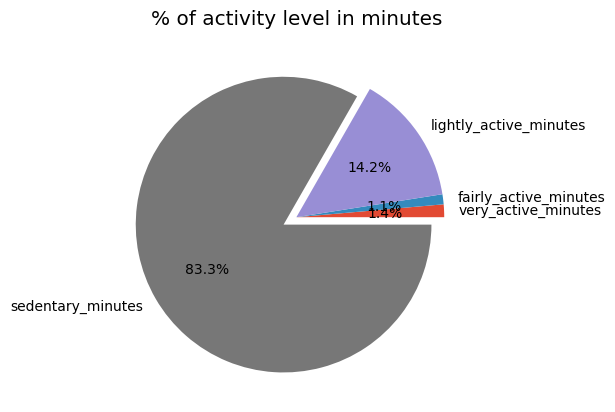

In [119]:
very_active_mins = df['very_active_minutes'].sum()
fairly_active_mins = df['fairly_active_minutes'].sum()
lightly_active_mins = df['lightly_active_minutes'].sum()
sedantary_active_mins = df['sedentary_minutes'].sum()

slices = [very_active_mins, fairly_active_mins, lightly_active_mins, sedantary_active_mins ]
labels = ['very_active_minutes', 'fairly_active_minutes', 'lightly_active_minutes', 'sedentary_minutes']
explode = [0,0,0,0.1]
plt.pie(slices, labels=labels, explode = explode , autopct = '%1.1f%%' )

plt.title('% of activity level in minutes')
plt.show()

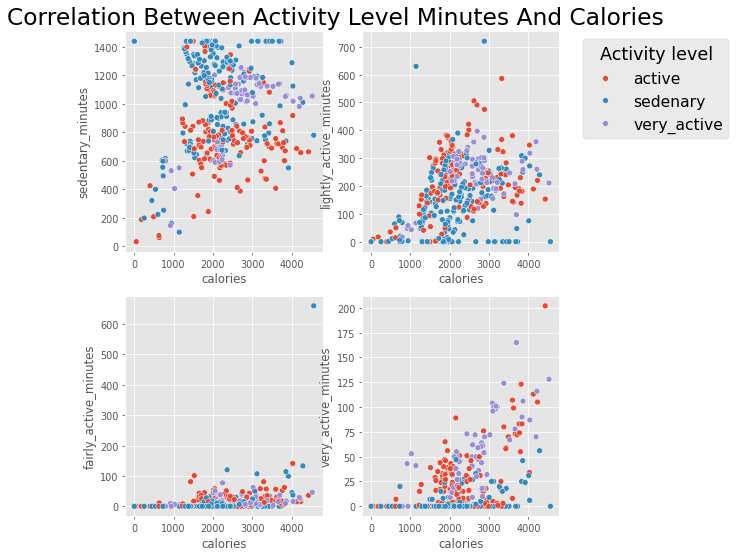

In [179]:
n_day_of_week = [0,1,2,3,4,5,6]

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8,9), dpi = 70)

sns.scatterplot(data = df, x = 'calories', y = 'sedentary_minutes', hue = 'activity_level', ax = axs[0,0], legend = False)
sns.scatterplot(data = df, x = 'calories', y = 'lightly_active_minutes', hue = 'activity_level', ax = axs[0,1], legend = False)
sns.scatterplot(data = df, x = 'calories', y = 'fairly_active_minutes', hue = 'activity_level', ax = axs[1,0], legend = False)
sns.scatterplot(data = df, x = 'calories', y = 'very_active_minutes', hue = 'activity_level', ax = axs[1,1])

plt.legend(title = 'Activity level',fontsize=16, title_fontsize=18, bbox_to_anchor = (1.9,2.2))

fig.suptitle('Correlation Between Activity Level Minutes And Calories', x=0.5, y=0.92, fontsize=24)
plt.show()